In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# S3 input directory (S3 -> EBS 변경)
mimic_dir = "/home/ubuntu/ebs_work/mimic-iv-ecg-diagnostic-electrocardiogram-matched-subset-1.0"
ls_mimic_dir = os.listdir(mimic_dir)
print(ls_mimic_dir)

['waveform_note_links.csv', 'files', 'RECORDS', 'SHA256SUMS.txt', 'machine_measurements_data_dictionary.csv', 'LICENSE.txt', 'machine_measurements.csv', 'record_list.csv']


In [4]:
# S3 output directory
dicom_out = "/home/ubuntu/dryou_mount/Users/KyuleeJeon/MIMIC-IV-ECG/mimic-iv-ecg-dcm"
print(os.listdir(dicom_out))

['files']


In [5]:
# EC2 workplace
currenct_dir = os.getcwd()
print(currenct_dir)

/home/ubuntu/workspace/MIMIC-IV


python run_convert.py \
  --input_csv /home/ubuntu/workspace/MIMIC-IV/study_path_list.csv \
  --wfdb_dir /home/ubuntu/ebs_work/mimic-iv-ecg-diagnostic-electrocardiogram-matched-subset-1.0 \
  --dcm_dir /home/ubuntu/ebs_work/mimic-iv-ecg-dcm \
  --df_info_pkl /home/ubuntu/workspace/MIMIC-IV/df_info_short.pkl \
  --output_csv /home/ubuntu/workspace/MIMIC-IV/study_path_list_with_dcm.csv \
  --study_id_col study_id \
  --path_col path

In [6]:
print(os.path.join(currenct_dir, 'df_info_short.pkl'))

/home/ubuntu/workspace/MIMIC-IV/df_info_short.pkl


# Structured Data

In [3]:
# record_list
df_record = pd.read_csv(os.path.join(mimic_dir, ls_mimic_dir[7]))
print(df_record.shape[0])
df_record.head(1)

800035


,subject_id,study_id,file_name,ecg_time,path
0,10000032,40689238,40689238,2180-07-23 08:44:00,files/p1000/p10000032/s40689238/40689238


In [14]:
# unique count
print(f"Unique subject_id: {df_record['subject_id'].nunique()}")
print(f"Unique study_id: {df_record['study_id'].nunique()}")
print(f"Unique file_name: {df_record['file_name'].nunique()}")
print(f"Unique path: {df_record['path'].nunique()}")

Unique subject_id: 161352
Unique study_id: 800035
Unique file_name: 800035
Unique path: 800035


In [15]:
# Are study_id == file_name == path.split('/')[-1] ?
all_true = (
    (df_record['study_id'].astype(str) == df_record['file_name'].astype(str)) &
    (df_record['file_name'].astype(str) == df_record['path'].apply(lambda x: str(x).split('/')[-1]))
).all()

True if all_true else False

True

In [4]:
# machine_measurements
df_meas = pd.read_csv(os.path.join(mimic_dir, ls_mimic_dir[6]))
print(df_meas.shape[0])
df_meas.head(1)

800035


/tmp/ipykernel_1618368/1824049149.py:2: DtypeWarning: Columns (16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meas = pd.read_csv(os.path.join(mimic_dir, ls_mimic_dir[6]))


,subject_id,study_id,cart_id,ecg_time,report_0,report_1,report_2,report_3,report_4,report_5,...,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis
0,10000032,40689238,6848296,2180-07-23 08:44:00,Sinus rhythm,Possible right atrial abnormality,NaN,Borderline ECG,NaN,NaN,...,60 Hz notch Baseline filter,659,40,128,170,258,518,81,77,79


In [17]:
print(f"Unique subject_id: {df_meas['subject_id'].nunique()}")
print(f"Unique study_id: {df_meas['study_id'].nunique()}")
print(df_meas.columns)

Unique subject_id: 161352
Unique study_id: 800035
Index(['subject_id', 'study_id', 'cart_id', 'ecg_time', 'report_0', 'report_1',
       'report_2', 'report_3', 'report_4', 'report_5', 'report_6', 'report_7',
       'report_8', 'report_9', 'report_10', 'report_11', 'report_12',
       'report_13', 'report_14', 'report_15', 'report_16', 'report_17',
       'bandwidth', 'filtering', 'rr_interval', 'p_onset', 'p_end',
       'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis'],
      dtype='object')


In [14]:
# waveform_note_links
df_note = pd.read_csv(os.path.join(mimic_dir, ls_mimic_dir[4]))
print(df_note.shape[0])
df_note.head(1)

609272


,subject_id,study_id,waveform_path,note_id,note_seq,charttime
0,10000032,40689238,files/p1000/p10000032/s40689238/40689238,10000032-EK-4,4,2180-07-23 08:44:00


## df_info_pkl 제작

In [18]:
df_record.head(2)

,subject_id,study_id,file_name,ecg_time,path
0,10000032,40689238,40689238,2180-07-23 08:44:00,files/p1000/p10000032/s40689238/40689238
1,10000032,44458630,44458630,2180-07-23 09:54:00,files/p1000/p10000032/s44458630/44458630


In [19]:
df_meas.head(2)

,subject_id,study_id,cart_id,ecg_time,report_0,report_1,report_2,report_3,report_4,report_5,...,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis
0,10000032,40689238,6848296,2180-07-23 08:44:00,Sinus rhythm,Possible right atrial abnormality,NaN,Borderline ECG,NaN,NaN,...,60 Hz notch Baseline filter,659,40,128,170,258,518,81,77,79
1,10000032,44458630,6848296,2180-07-23 09:54:00,Sinus rhythm,Possible right atrial abnormality,NaN,Borderline ECG,NaN,NaN,...,60 Hz notch Baseline filter,722,40,124,162,246,504,77,75,70


In [5]:
df_meas = df_meas[['subject_id', 'study_id', 'cart_id', 'bandwidth']].drop_duplicates()
df_info = pd.merge(df_record, df_meas, on=['subject_id', 'study_id'], how='inner')
print(df_info.shape[0])
print(f"Unique subject_id: {df_info['subject_id'].nunique()}")
print(f"Unique study_id: {df_info['study_id'].nunique()}")
print(f"Unique file_name: {df_info['file_name'].nunique()}")
print(f"Unique path: {df_info['path'].nunique()}")
df_info.head(2)

800035
Unique subject_id: 161352
Unique study_id: 800035
Unique file_name: 800035
Unique path: 800035


,subject_id,study_id,file_name,ecg_time,path,cart_id,bandwidth
0,10000032,40689238,40689238,2180-07-23 08:44:00,files/p1000/p10000032/s40689238/40689238,6848296,0.005-150 Hz
1,10000032,44458630,44458630,2180-07-23 09:54:00,files/p1000/p10000032/s44458630/44458630,6848296,0.005-150 Hz


In [6]:
df_info["lowpassfilter"] = (
    df_info["bandwidth"]
    .str.split("-").str[0]
    .str.replace("Hz", "").str.strip()
)

df_info["highpassfilter"] = (
    df_info["bandwidth"]
    .str.split("-").str[1]
    .str.replace("Hz", "").str.strip()
)

df_info.head(2)

,subject_id,study_id,file_name,ecg_time,path,cart_id,bandwidth,lowpassfilter,highpassfilter
0,10000032,40689238,40689238,2180-07-23 08:44:00,files/p1000/p10000032/s40689238/40689238,6848296,0.005-150 Hz,0.005,150
1,10000032,44458630,44458630,2180-07-23 09:54:00,files/p1000/p10000032/s44458630/44458630,6848296,0.005-150 Hz,0.005,150


In [7]:
df_info.groupby('bandwidth')['lowpassfilter'].value_counts(dropna=False)

bandwidth      lowpassfilter
0.0005-150 Hz  0.0005           111330
0.005-150 Hz   0.005            637197
0.05-150 Hz    0.05              51508
Name: count, dtype: int64

In [8]:
df_info.groupby('bandwidth')['highpassfilter'].value_counts(dropna=False)


bandwidth      highpassfilter
0.0005-150 Hz  150               111330
0.005-150 Hz   150               637197
0.05-150 Hz    150                51508
Name: count, dtype: int64

In [24]:
print(df_info.shape[0])
print(df_info.nunique())

800035
subject_id        161352
study_id          800035
file_name         800035
ecg_time          788657
path              800035
cart_id              156
bandwidth              3
lowpassfilter          3
highpassfilter         1
dtype: int64


In [ ]:
# SAVE
#df_info.to_pickle(os.path.join(currenct_dir, 'df_info.pkl'))

In [9]:
df_info_short = df_info[['subject_id', 'study_id', 'cart_id','lowpassfilter', 'highpassfilter']].drop_duplicates()
print(df_info_short.shape[0])
print(df_info_short.nunique())
df_info_short.head(2)

800035
subject_id        161352
study_id          800035
cart_id              156
lowpassfilter          3
highpassfilter         1
dtype: int64


,subject_id,study_id,cart_id,lowpassfilter,highpassfilter
0,10000032,40689238,6848296,0.005,150
1,10000032,44458630,6848296,0.005,150


In [ ]:
# SAVE
#df_info_short.to_pickle(os.path.join(currenct_dir, 'df_info_short.pkl'))

## study_ids.csv 제작

In [10]:
df_info.head(2)

,subject_id,study_id,file_name,ecg_time,path,cart_id,bandwidth,lowpassfilter,highpassfilter
0,10000032,40689238,40689238,2180-07-23 08:44:00,files/p1000/p10000032/s40689238/40689238,6848296,0.005-150 Hz,0.005,150
1,10000032,44458630,44458630,2180-07-23 09:54:00,files/p1000/p10000032/s44458630/44458630,6848296,0.005-150 Hz,0.005,150


In [11]:
study_ids = df_info[['study_id', 'path']].drop_duplicates()
print(study_ids.shape[0])
print(study_ids.nunique())
study_ids.head(2)
# SAVE
#study_ids.to_csv(os.path.join(currenct_dir, 'study_path_list.csv'), index=False)

800035
study_id    800035
path        800035
dtype: int64


,study_id,path
0,40689238,files/p1000/p10000032/s40689238/40689238
1,44458630,files/p1000/p10000032/s44458630/44458630


In [34]:
print(os.path.join(currenct_dir, 'study_path_list.csv'))

/home/ubuntu/workspace/MIMIC-IV/study_path_list.csv


Example

In [28]:
example_study_id = 40894787
df_record[df_record['study_id']==example_study_id]

,subject_id,study_id,file_name,ecg_time,path
20,10000826,40894787,40894787,2146-12-30 17:16:00,files/p1000/p10000826/s40894787/40894787


# Waveform Data

In [37]:
# example
study_id_example = 40689238

In [38]:
file_info = df_info_short.loc[df_info_short['study_id']==study_id_example]
file_info

,subject_id,study_id,lowpassfilter,highpassfilter
0,10000032,40689238,0.005,150


In [40]:
path_example = study_ids[study_ids['study_id']==study_id_example]['path'].values[0]
path_example

'files/p1000/p10000032/s40689238/40689238'

In [36]:
import wfdb

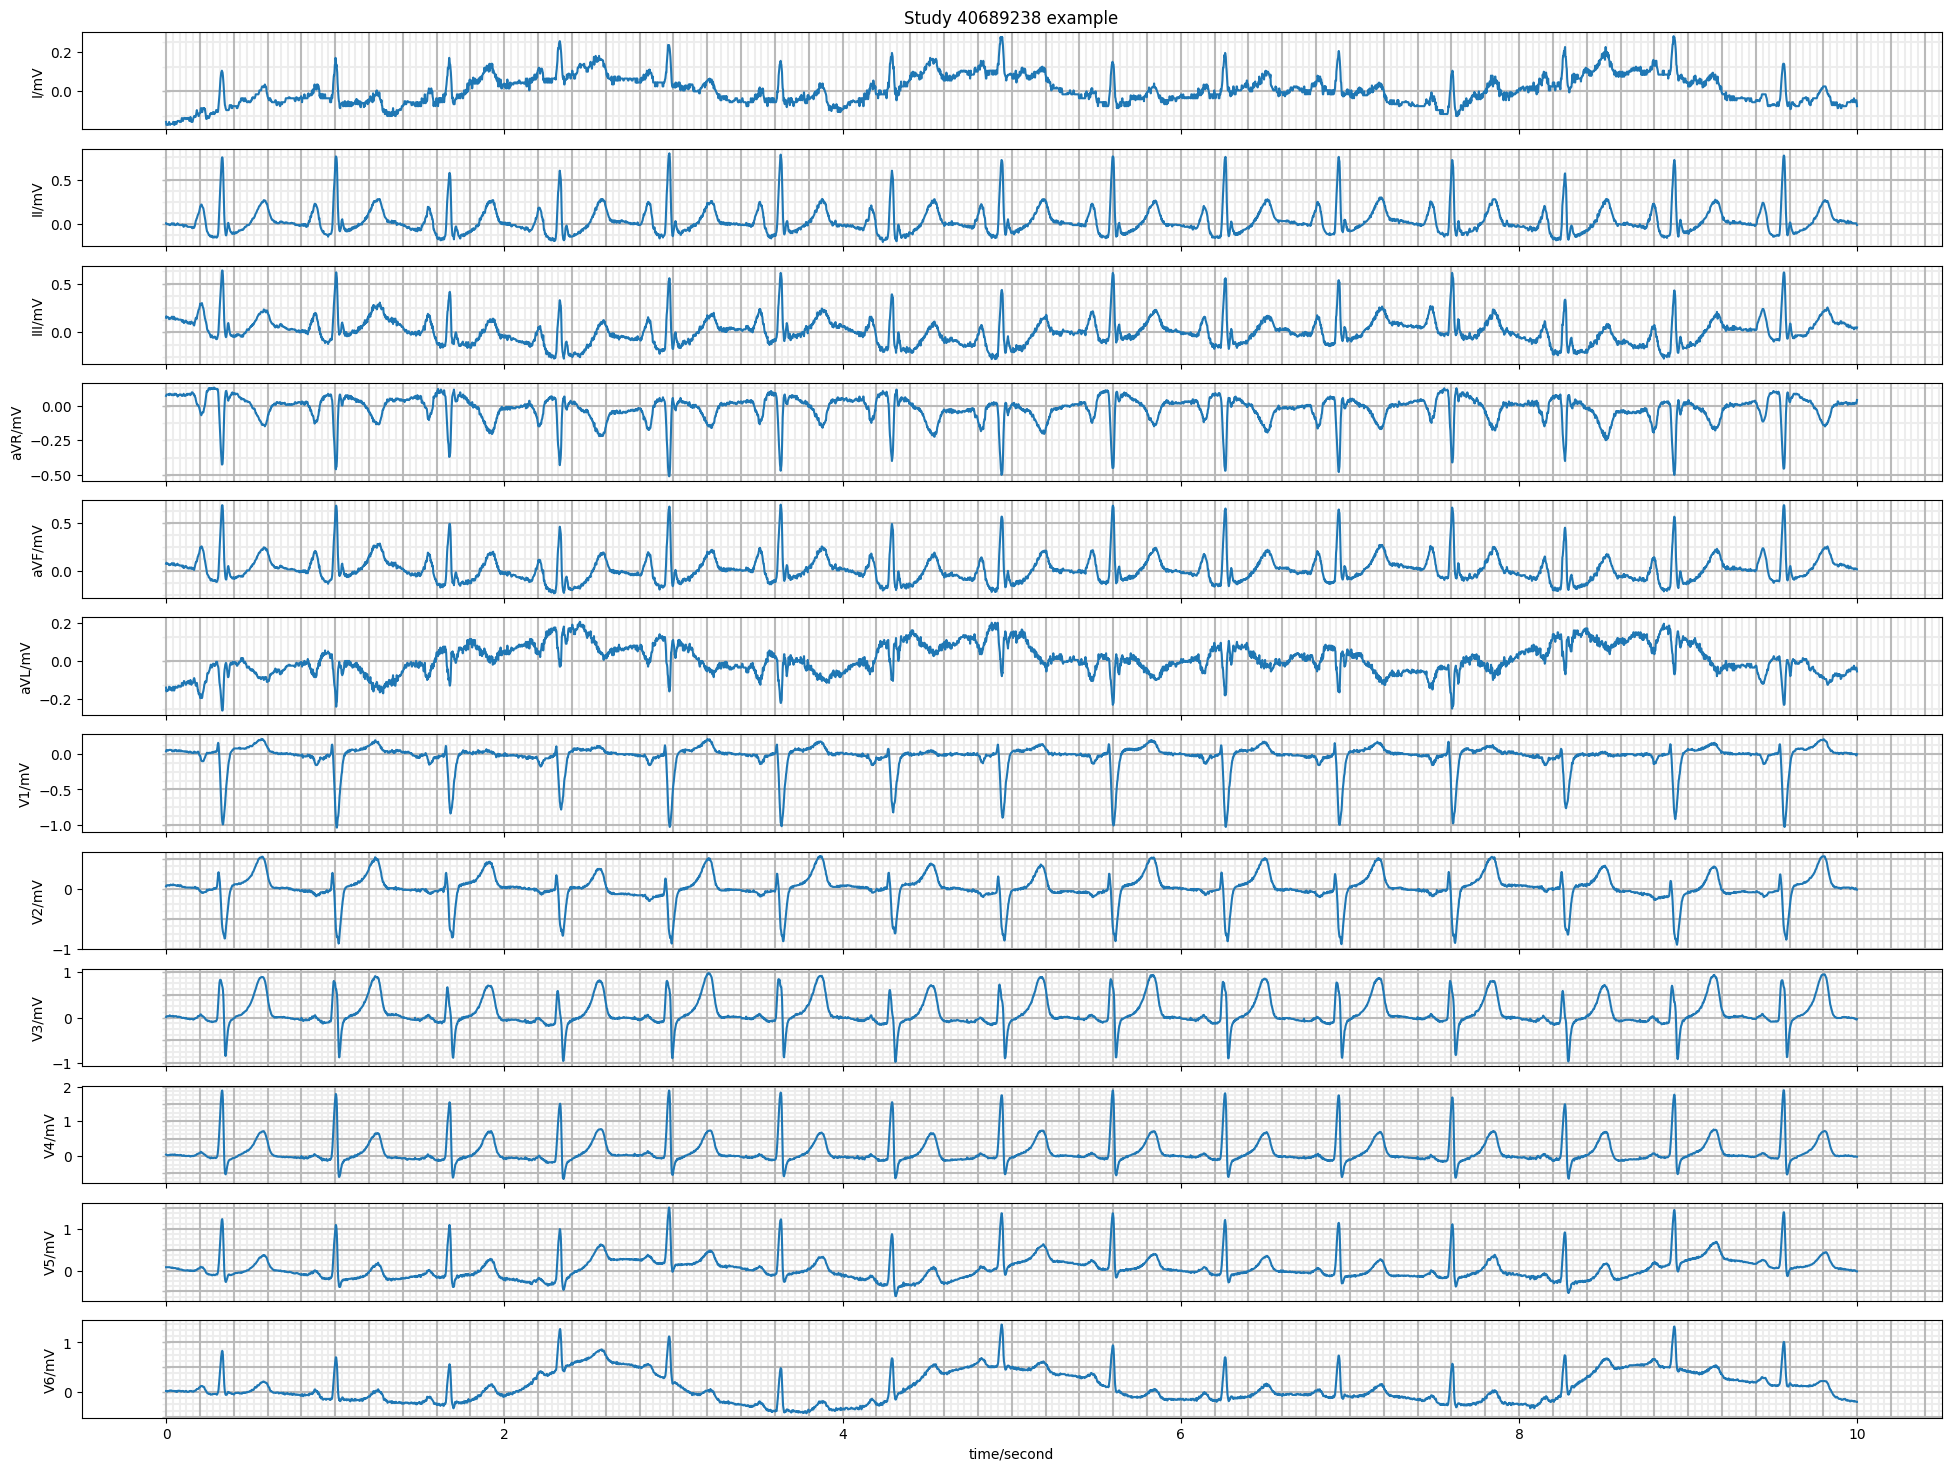

In [44]:
example_path = os.path.join(mimic_dir, path_example)
example_record = wfdb.rdrecord(example_path)
wfdb.plot_wfdb(record=example_record, figsize=(24,18), title=f"Study {study_id_example} example", ecg_grids='all')

# TRANSFORM
- via Terminal with multiprocessors

## Check .dcm

In [12]:
df_processed = pd.read_csv("/home/ubuntu/workspace/MIMIC-IV/study_path_list_with_dcm.csv")
print(df_processed.shape[0])
df_processed.head(2)

678348


/tmp/ipykernel_1618368/3679506320.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_processed = pd.read_csv("/home/ubuntu/workspace/MIMIC-IV/study_path_list_with_dcm.csv")


,study_id,path,dcm_path,dcm_error
0,40689238,files/p1000/p10000032/s40689238/40689238,/mnt/ebs/mimic-iv-ecg-dcm/files/p1000/p1000003...,NaN
1,44458630,files/p1000/p10000032/s44458630/44458630,/mnt/ebs/mimic-iv-ecg-dcm/files/p1000/p1000003...,NaN


In [ ]:
# Error 
error_ids = df_processed[~df_processed['dcm_path'].str.endswith('.dcm', na=False)]
print(error_ids.shape[0])
error_ids.head(2)

1


,study_id,path,dcm_path,dcm_error
221430,45897209,files/p1277/p12774361/s45897209/45897209,NaN,ValueError: Samples were not loaded correctly


In [13]:
print(len(study_ids) - len(df_processed))

121687


In [ ]:
# Unprocessed
undone_ids = study_ids[~study_ids['study_id'].isin(df_processed['study_id'].unique())]
print(undone_ids.shape[0])
#undone_ids.to_csv("/home/ubuntu/workspace/MIMIC-IV/study_path_list_with_dcm_undone.csv", index=False)

121687


In [25]:
#undone_ids에 error_ids[['study_id', 'path']] 추가
undone_ids = pd.concat([undone_ids, error_ids[['study_id', 'path']]])
print(undone_ids.shape[0])
undone_ids.head(2)

121688


,study_id,path
678348,48950506,files/p1847/p18472533/s48950506/48950506
678349,40240302,files/p1847/p18472593/s40240302/40240302


In [ ]:
# SAVE (Unprocessed 121687 + Error 1)
#undone_ids.to_csv("/home/ubuntu/workspace/MIMIC-IV/study_path_list_undone.csv", index=False)

cd /home/ubuntu/mimic-iv-ecg-to-dcm && source /home/ubuntu/dcm_venv/bin/activate && nohup python run_convert.py \
  --input_csv /home/ubuntu/workspace/MIMIC-IV/study_path_list.csv \
  --wfdb_dir /home/ubuntu/ebs_work/mimic-iv-ecg-diagnostic-electrocardiogram-matched-subset-1.0 \
  --dcm_dir /mnt/ebs/mimic-iv-ecg-dcm \
  --df_info_pkl /home/ubuntu/workspace/MIMIC-IV/df_info_short.pkl \
  --output_csv /home/ubuntu/workspace/MIMIC-IV/study_path_list_with_dcm_undone.csv \
  --study_id_col study_id \
  --path_col path > /tmp/run_convert_ebs500.log 2>&1 & echo "백그라운드 실행 시작! PID: $!"

## Check .dcm (2)

In [28]:
df_processed2 = pd.read_csv("/home/ubuntu/workspace/MIMIC-IV/study_path_list_undone_with_dcm.csv")
print(df_processed2.shape[0])
df_processed2.head(1)

121688


,study_id,path,dcm_path,dcm_error
0,48950506,files/p1847/p18472533/s48950506/48950506,/mnt/ebs/mimic-iv-ecg-dcm/files/p1847/p1847253...,NaN


In [43]:
df_error = df_processed2[~df_processed2['dcm_error'].isna()]
print(df_error.shape[0])
df_error.head()

1


,study_id,path,dcm_path,dcm_error
121687,45897209,files/p1277/p12774361/s45897209/45897209,NaN,ValueError: Samples were not loaded correctly


In [44]:
study_id_error = df_error['study_id'].values[0]
print(study_id_error)

45897209


In [45]:
path_example = df_processed2[df_processed2['study_id']==study_id_error]['path'].values[0]
path_example

'files/p1277/p12774361/s45897209/45897209'

In [46]:
example_path = os.path.join(mimic_dir, path_example)
example_record = wfdb.rdrecord(example_path)
wfdb.plot_wfdb(record=example_record, figsize=(24,18), title=f"Study {study_id_error} example", ecg_grids='all')

ValueError: Samples were not loaded correctly

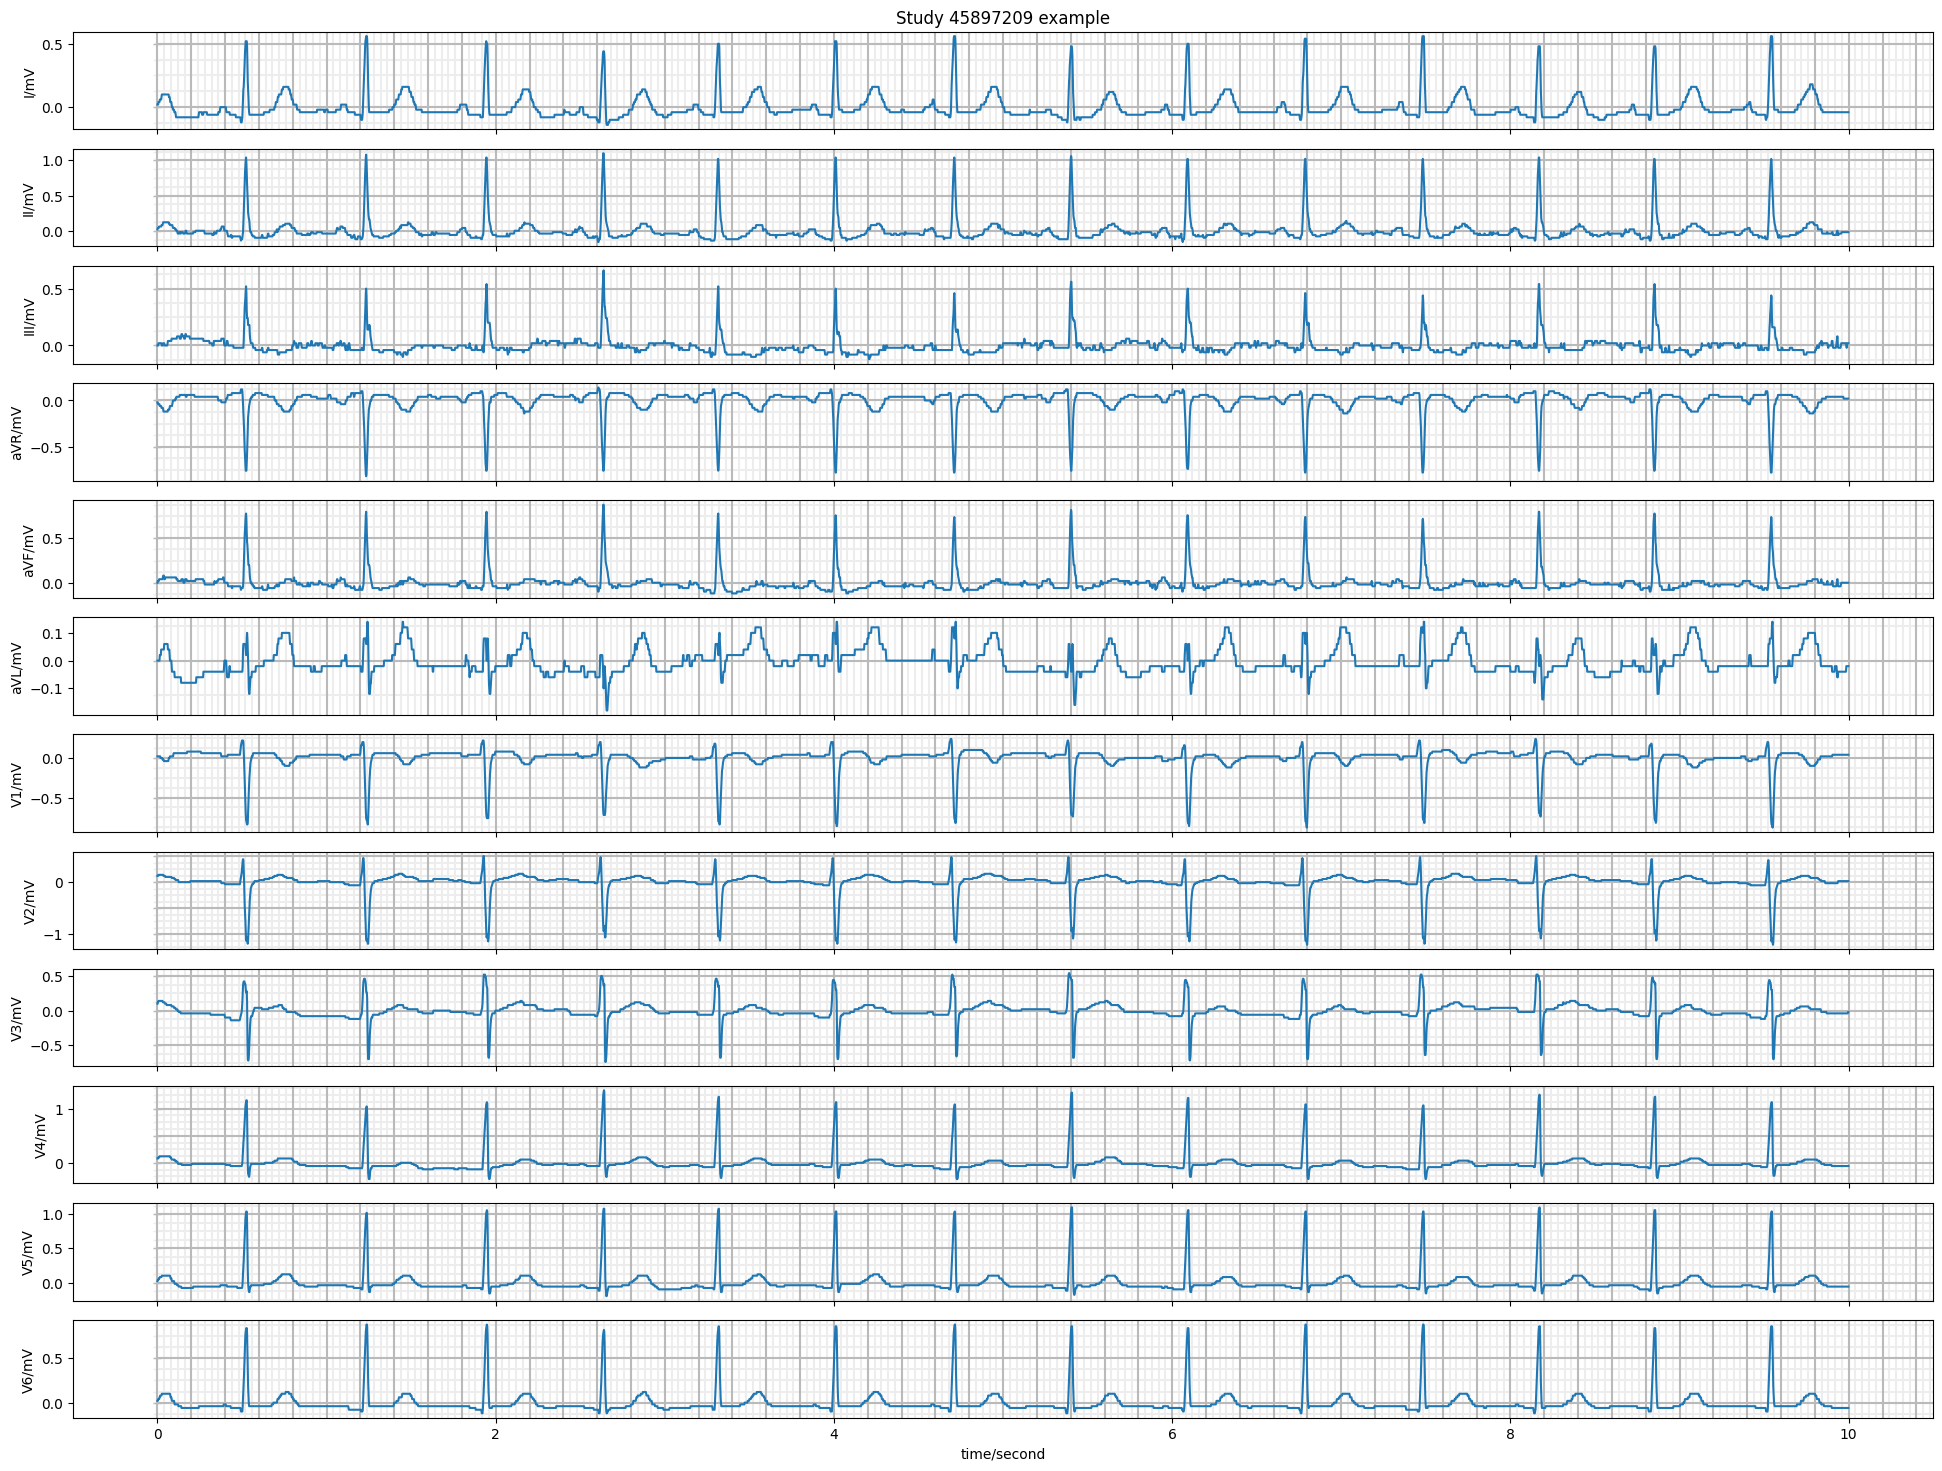

In [47]:
# mimic-iv-ecg 원본에서 해당 데이터 (45897209.dat, 45897209.hea) 다운받아서 직접 넣어줌
example_path = os.path.join(mimic_dir, path_example)
example_record = wfdb.rdrecord(example_path)
wfdb.plot_wfdb(record=example_record, figsize=(24,18), title=f"Study {study_id_error} example", ecg_grids='all')

In [ ]:
df_errors = df_error[['study_id', 'path']]
print(df_errors.shape[0])
# SAVE
#df_errors.to_csv("/home/ubuntu/workspace/MIMIC-IV/study_path_list_error.csv", index=False)

1


In [50]:
df_errors.head(2)

,study_id,path
121687,45897209,files/p1277/p12774361/s45897209/45897209


# CHECK

In [52]:
dcm_out_dir = "/mnt/ebs/mimic-iv-ecg-dcm/files/"

In [53]:
print(os.listdir(dcm_out_dir))

['p1000', 'p1001', 'p1002', 'p1003', 'p1004', 'p1005', 'p1006', 'p1007', 'p1008', 'p1009', 'p1010', 'p1011', 'p1012', 'p1013', 'p1014', 'p1015', 'p1016', 'p1017', 'p1018', 'p1019', 'p1020', 'p1021', 'p1022', 'p1023', 'p1024', 'p1025', 'p1026', 'p1027', 'p1028', 'p1029', 'p1030', 'p1031', 'p1032', 'p1033', 'p1034', 'p1035', 'p1036', 'p1037', 'p1038', 'p1039', 'p1040', 'p1041', 'p1042', 'p1043', 'p1044', 'p1045', 'p1046', 'p1047', 'p1048', 'p1049', 'p1050', 'p1051', 'p1052', 'p1053', 'p1054', 'p1055', 'p1056', 'p1057', 'p1058', 'p1059', 'p1060', 'p1061', 'p1062', 'p1063', 'p1064', 'p1065', 'p1066', 'p1067', 'p1068', 'p1069', 'p1070', 'p1071', 'p1072', 'p1073', 'p1074', 'p1075', 'p1076', 'p1077', 'p1078', 'p1079', 'p1080', 'p1081', 'p1082', 'p1083', 'p1084', 'p1085', 'p1086', 'p1087', 'p1088', 'p1089', 'p1090', 'p1091', 'p1092', 'p1093', 'p1094', 'p1095', 'p1096', 'p1097', 'p1098', 'p1099', 'p1100', 'p1101', 'p1102', 'p1103', 'p1104', 'p1105', 'p1106', 'p1107', 'p1108', 'p1109', 'p1110', 

In [ ]:
import numpy as np
import pydicom
import matplotlib.pyplot as plt
 
 
def dicom_ecg_to_lead_dict(dcm_path):
    """
    Read DICOM ECG Waveform and return:
      - leads: list of lead names (e.g., I, II, III, aVR, aVL, aVF, V1..V6)
      - lead_signals: dict {lead_name: 1D numpy array}
      - fs: sampling frequency (Hz)
    """
    ds = pydicom.dcmread(dcm_path)
 
    if "WaveformSequence" not in ds or len(ds.WaveformSequence) == 0:
        raise ValueError("No WaveformSequence found in this DICOM file.")
 
    wf = ds.WaveformSequence[0]
 
    n_ch = int(wf.NumberOfWaveformChannels)
    n_samp = int(wf.NumberOfWaveformSamples)
    fs = float(wf.SamplingFrequency)
 
    bits = int(wf.WaveformBitsAllocated)
    interp = str(wf.WaveformSampleInterpretation)
 
    if interp != "SS":
        raise NotImplementedError(f"Unsupported WaveformSampleInterpretation: {interp}")
 
    dtype = np.int16 if bits == 16 else np.int8
    raw = np.frombuffer(wf.WaveformData, dtype=dtype)
    arr = raw.reshape(n_samp, n_ch)
 
    # Lead names: ChannelLabel 우선, 없으면 SourceSequence/CodeMeaning, 그것도 없으면 CH#
    leads = []
    ch_defs = wf.ChannelDefinitionSequence
    for i, ch in enumerate(ch_defs):
        if hasattr(ch, "ChannelLabel"):
            name = str(ch.ChannelLabel).strip()
        elif hasattr(ch, "ChannelSourceSequence") and len(ch.ChannelSourceSequence) > 0:
            src = ch.ChannelSourceSequence[0]
            name = str(getattr(src, "CodeMeaning", getattr(src, "CodeValue", f"CH{i+1}"))).strip()
        else:
            name = f"CH{i+1}"
        leads.append(name)
 
    # Optional: apply ChannelSensitivityCorrectionFactor if present
    arr = arr.astype(np.float64, copy=True)
    for i, ch in enumerate(ch_defs):
        if hasattr(ch, "ChannelSensitivityCorrectionFactor"):
            arr[:, i] *= float(ch.ChannelSensitivityCorrectionFactor)
 
    lead_signals = {leads[i]: arr[:, i] for i in range(n_ch)}
    return leads, lead_signals, fs
 
 
def plot_12_lead_ecg_from_dicom(dcm_path, lead_columns=None, use_time_axis=False):
    """
    Plot like your old function (12 rows, 1 col).
    - lead_columns: 원하는 lead 순서 리스트. None이면 표준 12리드 순서 사용.
    - use_time_axis: True면 x축을 seconds로, False면 sample index로.
    """
    if lead_columns is None:
        lead_columns = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
 
    leads, lead_signals, fs = dicom_ecg_to_lead_dict(dcm_path)
 
    num_leads = len(lead_columns)
    fig, axes = plt.subplots(num_leads, 1, figsize=(15, num_leads * 2), sharex=True)
 
    # axes가 단일일 때 대비
    if num_leads == 1:
        axes = [axes]
 
    for i, lead in enumerate(lead_columns):
        ax = axes[i]
 
        if lead not in lead_signals:
            # 대소문자/공백 차이 대비한 약한 매칭
            norm = lambda s: str(s).strip().upper().replace(" ", "")
            target = norm(lead)
            cand = {norm(k): k for k in lead_signals.keys()}
            if target in cand:
                lead_key = cand[target]
            else:
                ax.set_title(f"{lead} (not found)")
                ax.grid(True)
                continue
        else:
            lead_key = lead
 
        y = lead_signals[lead_key]
 
        if use_time_axis:
            x = np.arange(len(y)) / fs
            ax.plot(x, y)
            ax.set_xlabel("Time (s)" if i == num_leads - 1 else "")
        else:
            ax.plot(y)
            ax.set_xlabel("Time Points" if i == num_leads - 1 else "")
 
        ax.set_title(lead)
        ax.grid(True)
 
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [55]:
# example
example_dcm_path = "/mnt/ebs/mimic-iv-ecg-dcm/files/p1277/p12774361/s45897209/45897209.dcm"
example_dcm = pydicom.dcmread(example_dcm_path)
print(example_dcm)


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 210
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: 12-lead ECG Waveform Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.20650441729257764785946482851884546933
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002,0013) Implementation Version Name         SH: 'PYDICOM 3.0.1'
-------------------------------------------------
(0008,0016) SOP Class UID                       UI: 12-lead ECG Waveform Storage
(0008,0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.20650441729257764785946482851884546933
(0008,0020) Study Date                          DA: '21880803'
(0008,002A) Acquisition DateTime                DT: '21880803042800'
(0008,0030) Study Time    

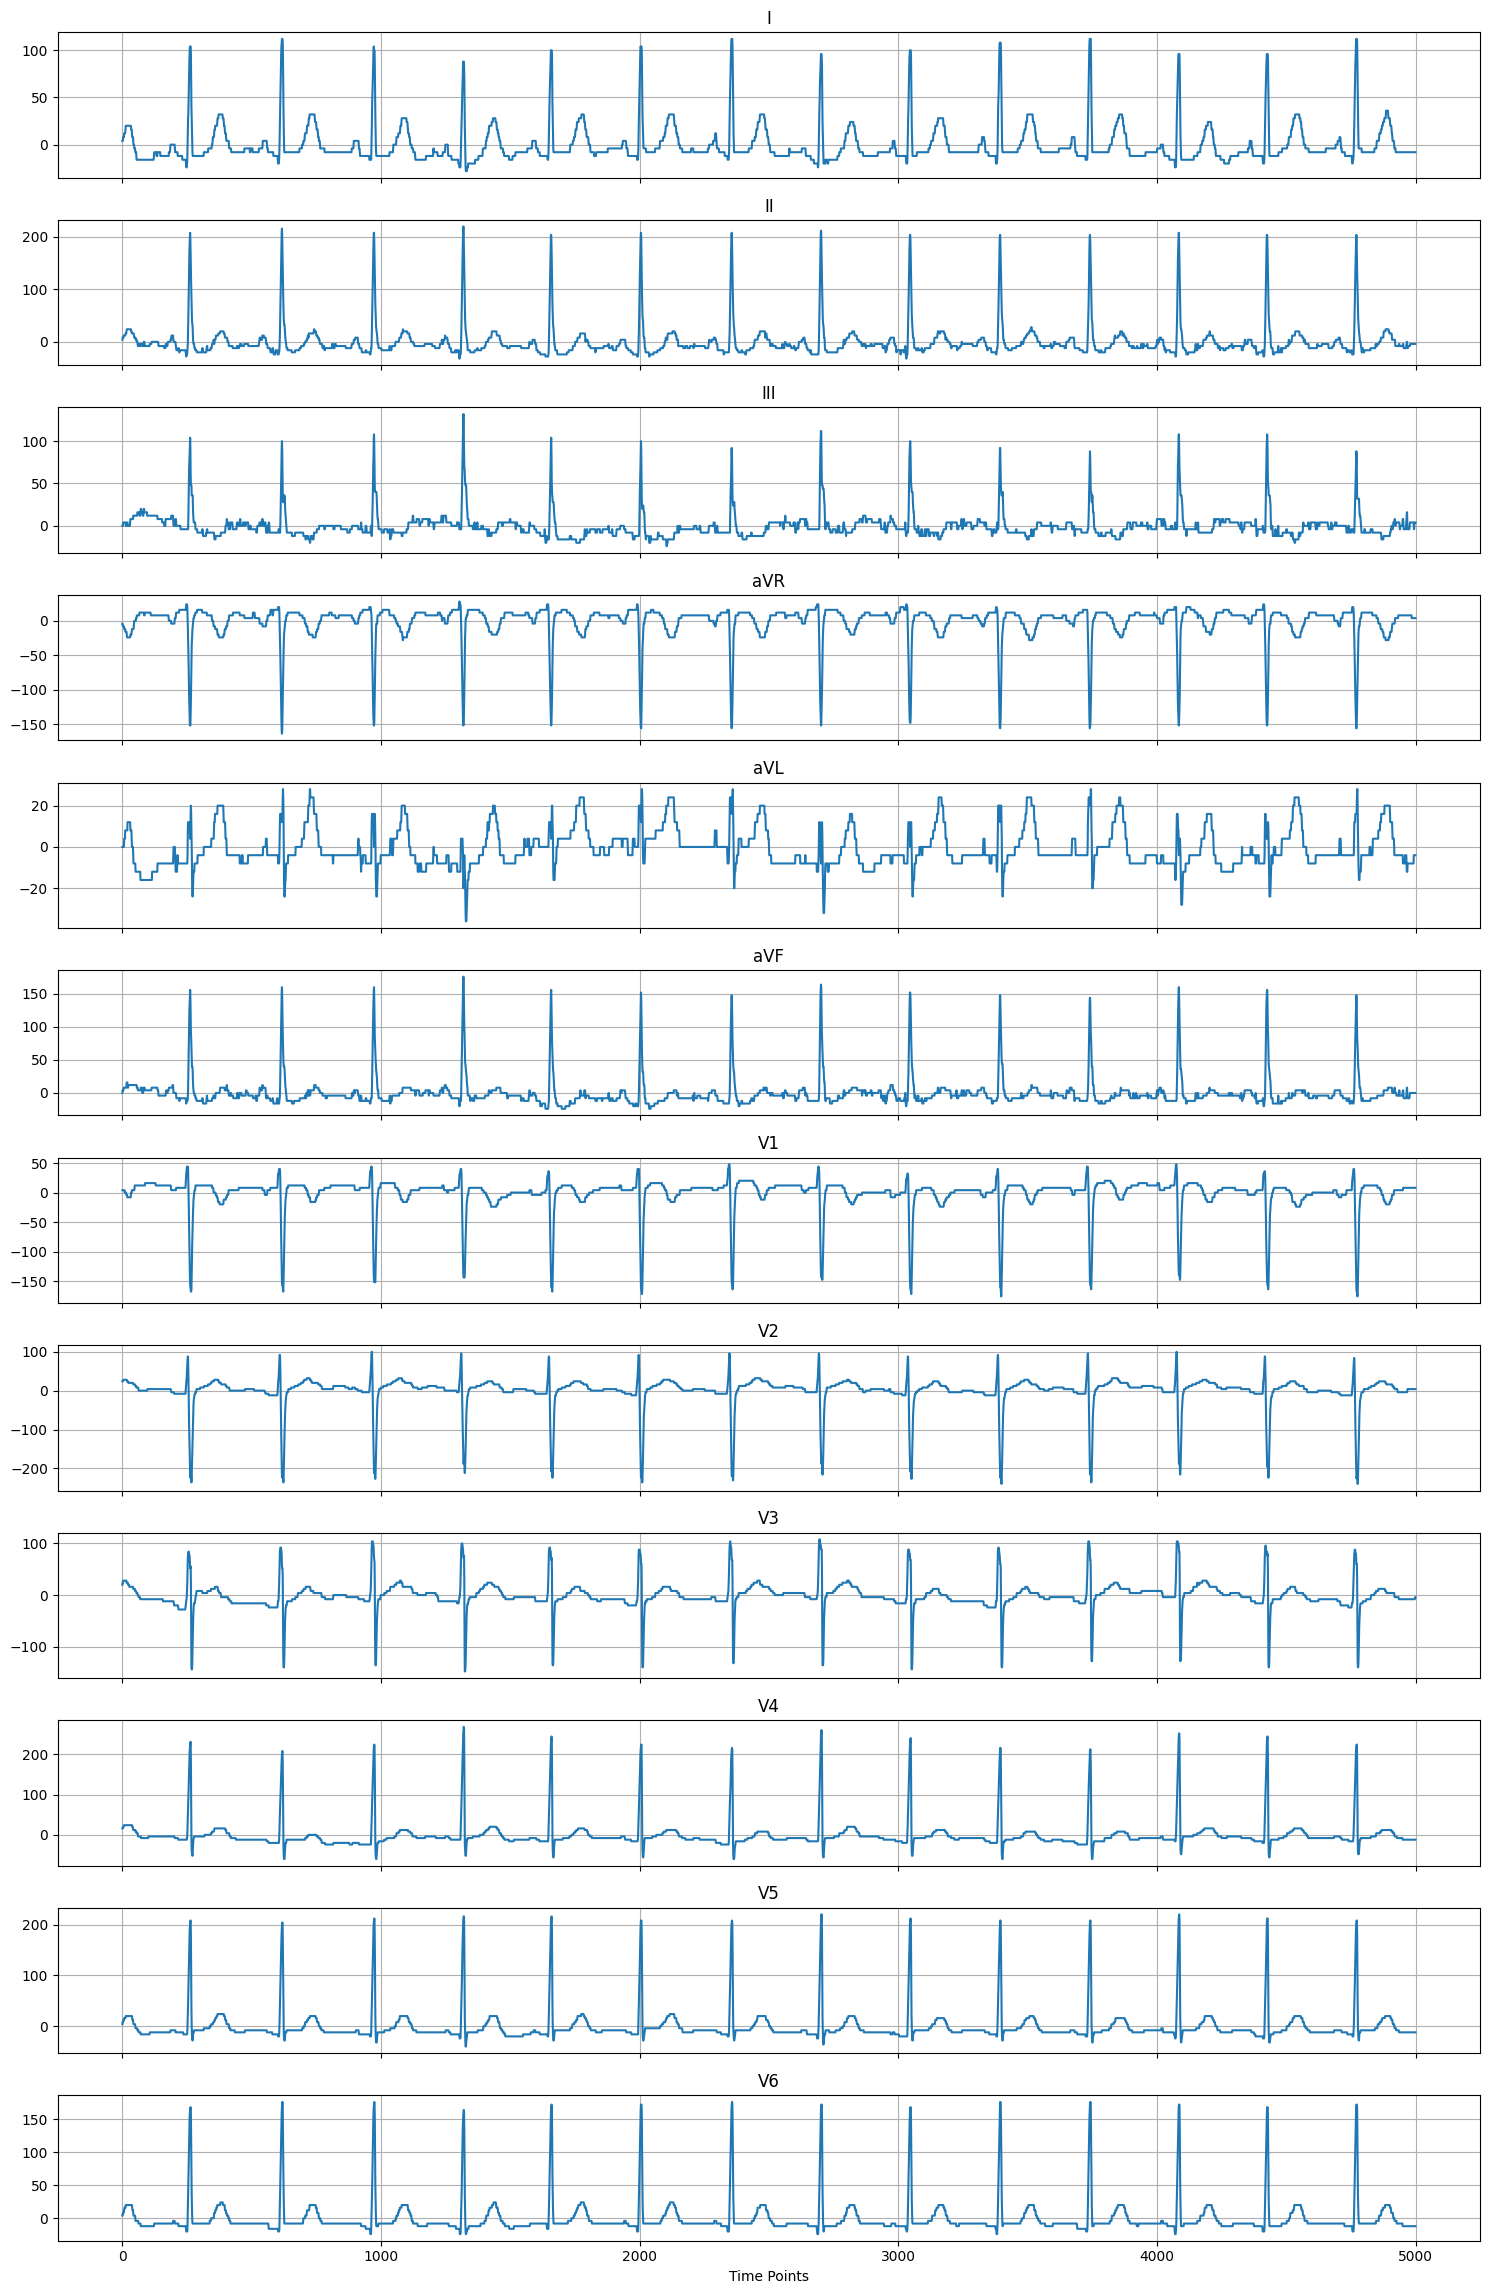

In [59]:
# visualize
plot_12_lead_ecg_from_dicom(example_dcm_path)